# Stellar Analysis

#### Importing Data and Cleaning Data Frame

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

file_path = "../Resources/Original_Data.csv"
original_df = pd.read_csv(file_path)
original_df.head()




project_data = original_df[["pl_name", "hostname", "disc_year", "sy_snum", "sy_pnum", "pl_rade", "pl_masse", "pl_dens", "pl_orbper", "pl_orbsmax", "pl_eqt", "st_teff", "st_rad", "st_mass", "st_dens", "sy_dist"]]
project_data.head()

no_dup_data = project_data.drop_duplicates(subset = ["pl_name", "hostname"])
no_dup_data


rename_df = no_dup_data.rename(columns = {"pl_name": "Planet_Name",
                                          "hostname": "Star_Name", 
                                          "disc_year": "Discover_Year",
                                          "sy_snum": "Number_of_Stars",
                                          "sy_pnum": "Number_of_Planets",
                                          "pl_rade": "Planet_Radius",
                                          "pl_masse": "Planet_Mass",
                                          "pl_dens": "Planet_Density",
                                          "pl_orbper": "Planet_Orbital_Period(Days)",
                                          "pl_orbsmax": "Planet_Orbital_Semi_Major_Axis(au)",
                                          "pl_eqt": "Planet_Equilibrium_Temp(K)", 
                                          "st_teff": "Stellar_Effective_Temp(K)",
                                          "st_rad": "Stellar_Radius", 
                                          "st_mass": "Stellar_Mass", 
                                          "st_dens": "Stellar_Density", 
                                          "sy_dist": "System_Distance(pc)"})
rename_df

test_df = rename_df.dropna()
test_df



,Planet_Name,Star_Name,Discover_Year,Number_of_Stars,Number_of_Planets,Planet_Radius,Planet_Mass,Planet_Density,Planet_Orbital_Period(Days),Planet_Orbital_Semi_Major_Axis(au),Planet_Equilibrium_Temp(K),Stellar_Effective_Temp(K),Stellar_Radius,Stellar_Mass,Stellar_Density,System_Distance(pc)
160,CoRoT-10 b,CoRoT-10,2010,1,1,10.548,883.56740,4.1600,13.240600,0.10600,647.0,5075.0,0.74,0.90,3.1000,338.386
168,CoRoT-12 b,CoRoT-12,2010,1,1,15.132,281.91521,0.4480,2.828042,0.03940,1410.0,5675.0,1.05,1.02,1.2500,1126.370
175,CoRoT-14 b,CoRoT-14,2010,1,1,11.411,2437.75610,9.0000,1.512140,0.02687,1936.0,6035.0,1.19,1.12,0.9400,1744.600
180,CoRoT-17 b,CoRoT-17,2011,1,1,11.287,781.86180,3.0058,3.768100,0.04810,1610.0,5740.0,1.62,1.04,0.3420,1176.120
206,CoRoT-22 b,CoRoT-22,2014,1,1,4.880,12.20000,0.2490,9.755980,0.09200,885.0,5939.0,1.14,1.10,1.0270,627.158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26660,WASP-94 A b,WASP-94 A,2014,2,2,19.280,143.65300,0.1180,3.950191,0.05500,1604.0,6153.0,1.62,1.45,0.4850,211.211
26669,WASP-97 b,WASP-97,2014,1,1,12.670,419.52000,1.2100,2.072760,0.03303,1555.0,5640.0,1.06,1.12,1.3100,151.068
26682,WTS-1 b,WTS-1,2012,1,1,16.700,1274.44000,1.6100,3.352057,0.04700,1500.0,6250.0,1.15,1.20,1.1129,2346.010
26732,XO-5 b,XO-5,2008,1,1,12.780,378.20000,1.0600,4.187756,0.05150,1230.0,5430.0,1.13,1.04,1.0100,276.211


#### Defining Terestrial Planets

In order to distinguish weather or not a planet is terestrial one must look at both the density and mass of the planet being observed.

* If the planet has a density greater than 5 g/cm^3 and a mass less than Uranus. A conclusion can usually be drawn that the planet is terestrial.

      
* Ran throught data to find which values are "good" or in other words terestrial. And associate a color to them.


* Add the qualifying "good" list to the Data Frame. 

In [2]:
def terestrial(dens , mass):
    if dens > 5 and mass < 17.15:
        value = True
    else:
        value = False
    return value


good = []
for n in range(227):
     density = test_df.iloc[n, 7]
     mass = test_df.iloc[n,6]
     value = terestrial(density, mass)
     good.append(value)


test_df["good"] = good
test_df


def pltcolor(lst):
    cols=[]
    for l in lst:
        if l== True:
            cols.append('blue')
        elif l== False:
            cols.append('gray')
    return cols

C:\Users\staff\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


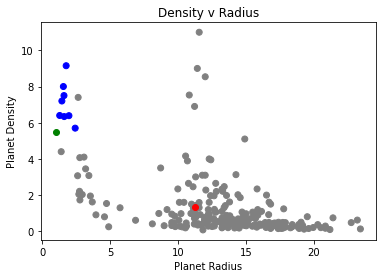

In [8]:
# Plot of the radius vs planet density
cols = pltcolor(good)
plt.scatter(test_df["Planet_Radius"],test_df["Planet_Density"], c = cols)
plt.plot(1, 5.51, "go")
plt.plot(11.2089 , 1.33, "ro" )
plt.xlabel("Planet Radius")
plt.ylabel("Planet Density")
plt.title("Density v Radius")

plt.savefig("Output/terestrial.png")

In [42]:
solar = original_df[["hostname", "sy_snum", "st_age", "st_rad", "st_mass", "st_dens", "st_teff", "st_lum", "st_met", "st_vsin"]]
test_s = solar.drop_duplicates(subset = ["hostname"]).dropna()


test_solar = test_s.rename(columns = {"hostname": "Star Name", 
                                      "sy_snum": "Number of Stars", 
                                      "st_age": "Star Age", 
                                      "st_mass": "Star Mass",
                                      "st_rad": "Star Radius",
                                      "st_dens": "Star Density",
                                      "st_teff": "Star Temp", 
                                      "st_lum": "Star Luminocity", 
                                      "st_met": "Star Metalicity", 
                                      "st_vsin": "Star Velocity"})
test_solar.reindex()

,Star Name,Number of Stars,Star Age,Star Radius,Star Mass,Star Density,Star Temp,Star Luminocity,Star Metalicity,Star Velocity
341,EPIC 246851721,2,3.020,1.59,1.32,0.4650,6202.0,0.526,0.141,74.92
347,G 9-40,1,9.900,0.31,0.29,14.1100,3348.0,-1.971,0.040,2.00
815,HAT-P-51,1,8.200,1.04,0.98,1.2230,5449.0,-0.066,0.270,1.70
820,HAT-P-53,1,4.670,1.21,1.09,0.8700,5956.0,0.217,0.000,4.10
834,HAT-P-57,3,1.000,1.50,1.47,0.6150,7500.0,0.806,-0.250,102.10
...,...,...,...,...,...,...,...,...,...,...
25955,TOI-157,1,12.820,1.17,0.95,0.8420,5404.0,0.020,0.240,2.50
25957,TOI-163,1,1.823,1.65,1.44,0.4518,6495.0,0.636,0.220,14.08
25959,TOI-169,1,4.700,1.29,1.15,0.7560,5880.0,0.253,0.240,2.50
25960,TOI-172,1,7.400,1.78,1.13,0.2860,5645.0,0.461,0.148,5.10


In [43]:
# Defined function linear regression which will plot linear regression
def linear_regression(x, y, x_label, y_label, title, a, b):
    plt.scatter(x, y, edgecolor = "black")
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    plt.plot(x, slope*x + intercept, "r-")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    slope = round(slope, 4)
    plt.annotate("Slope is " + str(slope), (a,b), xycoords = 'axes fraction')
    plt.savefig("Output/" + str(title) + ".png")
    plt.show

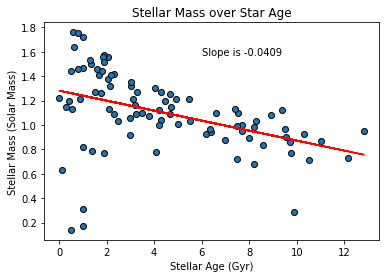

In [44]:
linear_regression(test_solar["Star Age"], test_solar["Star Mass"], "Stellar Age (Gyr)", "Stellar Mass (Solar Mass)", "Stellar Mass over Star Age", .47, .85)


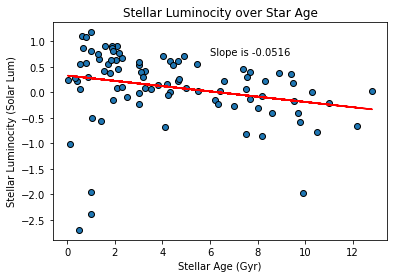

In [45]:
linear_regression(test_solar["Star Age"], test_solar["Star Luminocity"], "Stellar Age (Gyr)", "Stellar Luminocity (Solar Lum)", "Stellar Luminocity over Star Age", .47, .85)

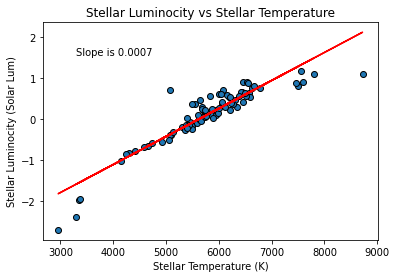

In [46]:
linear_regression(test_solar["Star Temp"], test_solar["Star Luminocity"], "Stellar Temperature (K)", "Stellar Luminocity (Solar Lum)", "Stellar Luminocity vs Stellar Temperature", .1, .85)

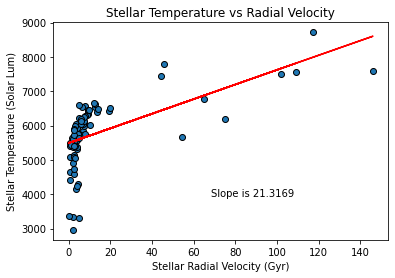

In [47]:
linear_regression(test_solar["Star Velocity"], test_solar["Star Temp"], "Stellar Radial Velocity (Gyr)", "Stellar Temperature (Solar Lum)", "Stellar Temperature vs Radial Velocity", .47, .2)